In [1]:


import json

correction_1_path = "EMIP_corrector1/example/trial_2_participant_49_rectangle_python_CORRECTED.json"
correction_2_path = "EMIP_corrector2/example/trial_2_participant_49_rectangle_python_CORRECTED.json"

trial_image = "EMIP_corrector1/example/rectangle_python.png"

correction_1 = open(correction_1_path, 'r')
correction_2 = open(correction_2_path, 'r')

data_1_text = correction_1.read()
data_2_text = correction_2.read()

data_1 = list(json.loads(data_1_text).values())
data_2 = list(json.loads(data_2_text).values())

# data_1

In [2]:
import emip_toolkit as EMTK

image_path = "./"
aoi = EMTK.find_aoi(trial_image, image_path, level="sub-line")
aoi.head()

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,603.5,277,59,23,EMIP_corrector1/example/rectangle_python.png
1,sub-line,line 1 part 2,669.5,277,106,23,EMIP_corrector1/example/rectangle_python.png
2,sub-line,line 1 part 3,785.5,277,9,23,EMIP_corrector1/example/rectangle_python.png
3,sub-line,line 2 part 1,647.5,318,38,25,EMIP_corrector1/example/rectangle_python.png
4,sub-line,line 2 part 2,691.5,318,96,25,EMIP_corrector1/example/rectangle_python.png


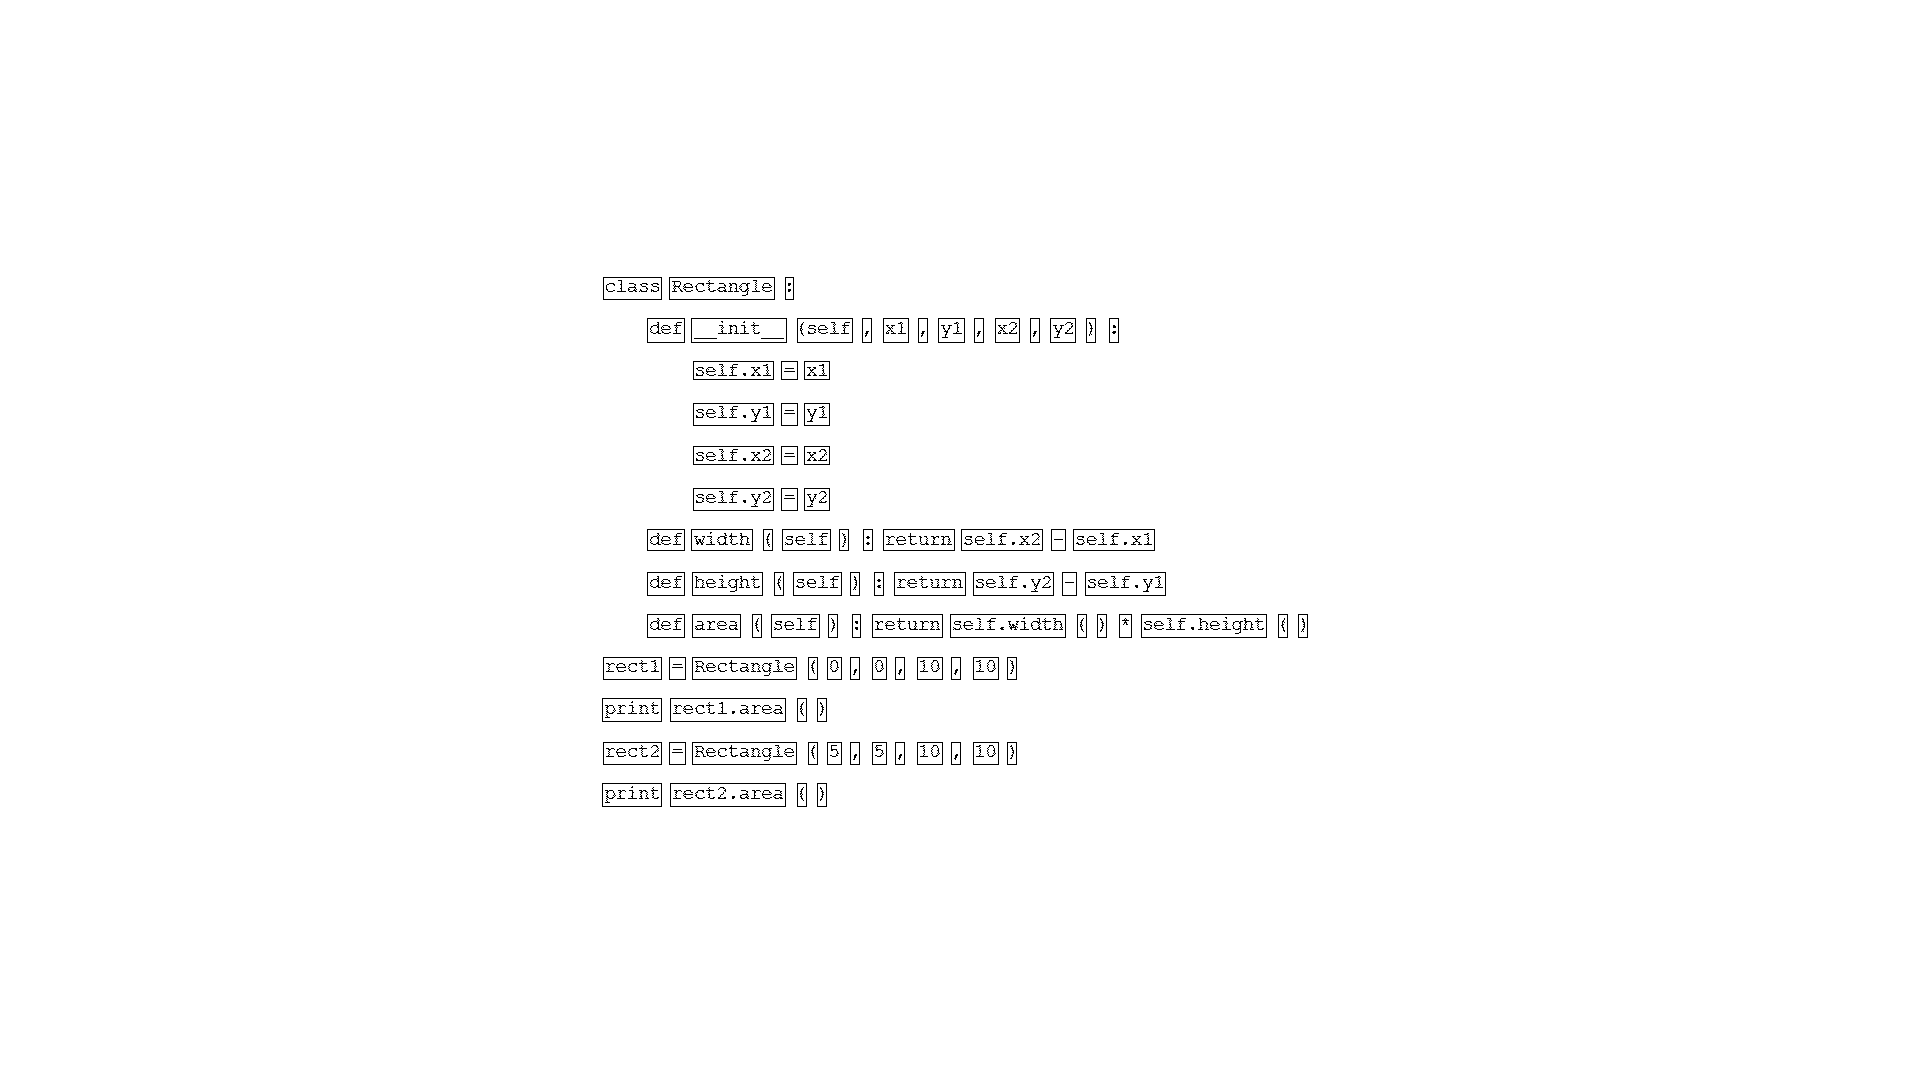

In [3]:
EMTK.draw_aoi(aoi, trial_image, image_path)

In [4]:
import correction
#correction.draw_fixation(trial_image, data_2)

In [5]:
# percentage of fixations that landded on an AOI
percentage, match_list = correction.correction_quality(aoi, data_1, data_1)
print(percentage)

0.900990099009901


1.0


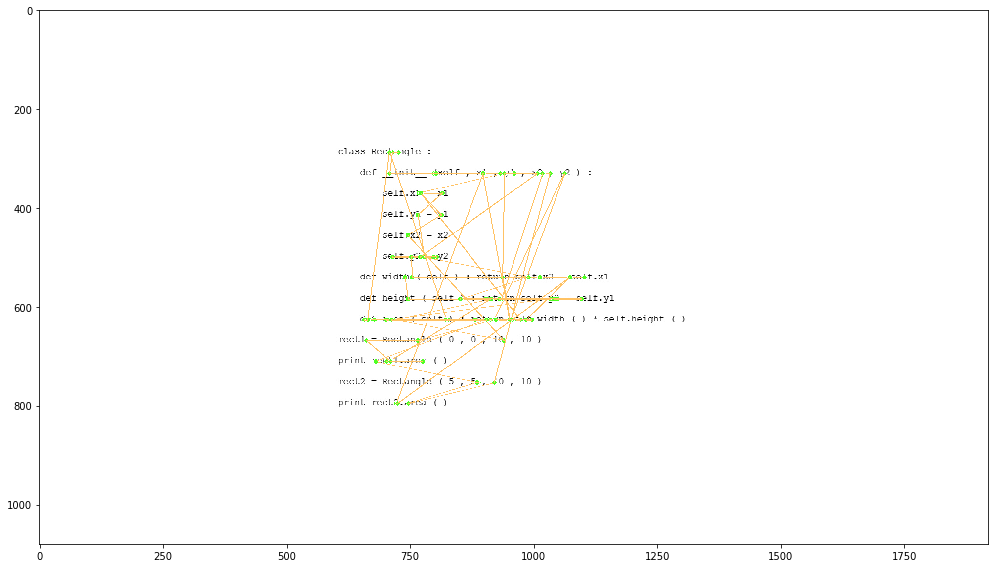

In [6]:
import correction
percentage, match_list = correction.compare_corrections(aoi, data_1, data_2)
print(percentage)
correction.draw_comparison(trial_image, data_1, data_2, match_list)

In [30]:
# intentionally adding error 
#original: [924.48375, 626.0, 96.0]
data_2[1] = [944.48375, 626.0, 296.0]
data_2[-1] = [944.48375, 626.0, 296.0]

0.9702970297029703


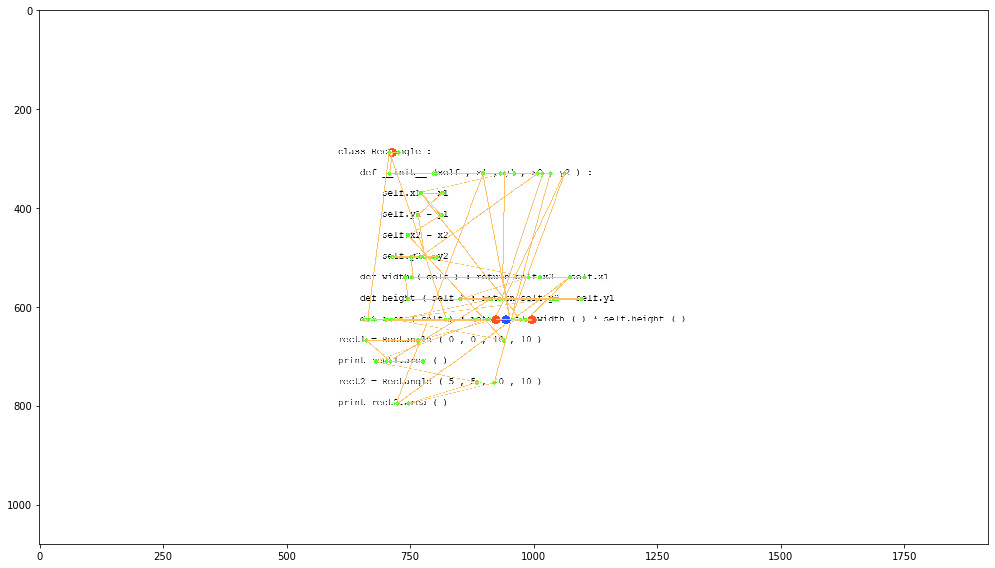

In [31]:
# import correction
percentage, match_list = correction.compare_corrections(aoi, data_1, data_2)
print(percentage)
correction.draw_comparison(trial_image, data_1, data_2, match_list)

# Merging Correction:

In [32]:
index = 0
results = data_1.copy()

In [33]:
percentage, match_list = correction.compare_corrections(aoi, data_1, data_2)        

In [40]:

while index < len(match_list):
    
    if match_list[index] == 0:
        
        print(index)

        correction.draw_comparison(trial_image, data_1[:index+1], data_2[:index+1], match_list)
        break
    
    index += 1

In [39]:
selection = input("Select r for red, b for blue:")
if selection == 'r':
    results[index] = data_1[index]
elif selection == 'b':
    results[index] = data_2[index]

index += 1

Select r for red, b for blue:r


In [28]:
import json

data = {}

for index, fixation in enumerate(results):
    data[index] = fixation

output = json.dumps(data)

golden_path = correction_1_path.split('.')[0] + '_golden.json'
out_file = open(golden_path, 'w')

out_file.write(output)

out_file.close()